#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Syed Jafrul Husen<br>
<b>Reg. No:</b> 170103020013

### Assignment 1: Perceptron 
<b>This assignment contains four tasks</b><br>
Perceptron is the first neural network model that can learn from data, invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. 

* Linear classifier.
* Binary or bipolar data
\begin{equation}
  \hat y=
  \begin{cases}
    1, &  \sum_{i}^{m} w_i.x_i+b> 0  \\
    -1, & \text{otherwise}
  \end{cases}
\end{equation}

Or, we can write [for a single data vector= x, weight vector=w and bias=b]
\begin{equation}
  z=x.w+b\\
  \hat y=sign(z)
\end{equation}

Or, we can simplify,
\begin{equation}
  z=X.W^T\\
  \hat y=sign(z)
\end{equation}
where X=data (NxD), W=weight vector(1xD) , b=bias(1x1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
y=np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

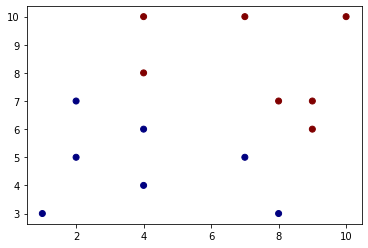

In [3]:
plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')   
plt.show()

<b>Task_1: calculate output and plot the data</b><br>
Given, w=[-2.0, 0.4, 0.1], calculate output $\hat y$ <br> <b>note:</b> w[0]=bias<br>
 
* Output should be, $\hat y=[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]$
* Note: variable XX contains 1 in the first column and the rest is same as X. This will remove the necessity of useing seperate bias.

In [4]:
XX=np.c_[np.ones(X.shape[0]), X]  #add column with value 1 in the first column. to remove the need of separate bias
print(XX[:4])

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]]


In [5]:
#your code goes here.
w=[-2.0, 0.4, 0.1]

def cal_y_predict(x,w):
    y_head = np.zeros(len(y))
    for i in range(len(y)):
        y_head[i] = np.sign(x[i][0]*w[0] + x[i][1]*w[1] + x[i][2]*w[2])
    return y_head
#print(w)
y_head = cal_y_predict(XX,w)
print(y_head)

[ 1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.]


<b>Plotting the hyperplane</b>

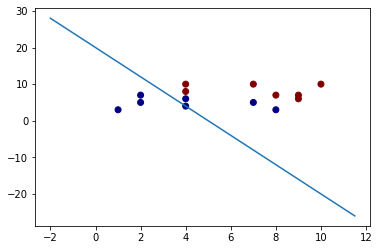

In [6]:
w=[-2.0, 0.4, 0.1]

nx=np.arange(-2,12,0.5)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

<b>Task_2: Update check</b>
Let's choose a missclassified data,  $rx=[1, 4,6], ry=-1$ <br>
Update rule: $w=w+ \eta(ry*rx)$  <br>
Where, learning rate $0> \eta \leq 1$ <br>
Let, $\eta=0.1$  <br>
* update w for the data. w should be [-2.1,  0. , -0.5]

In [7]:
rx = np.array([1,4,6])
ry = -1
y_head = np.sign(rx[0]*w[0] + rx[1]*w[1] + rx[2]*w[2])
learning_rate = 0.1

for i in range(100000):
    if(y_head==ry):
        break
    #print(rx)
    #print(ry)
    w = w + learning_rate * (rx*ry)
    y_head = np.sign(rx[0]*w[0] + rx[1]*w[1] + rx[2]*w[2])
print(w)

[-2.1  0.  -0.5]


<b>Task_3: Train perceptron</b> <br>

* your task is to implement perceptron learning algorithm. Your implementation should correctly classify the data above. <br>
* Print the trained W <br>
* Plot the data and the decision boundary <br>
* Average Loss $loss=\frac{1}{N} \sum(y-\hat y)^2$
* Plot loss history.

In [8]:
def avg_loss(y,yh):
    loss = 0.0
    for i in range(len(y)):
        loss = loss + (y[i]-yh[i])*(y[i]-yh[i])
    loss = loss/(len(y))
    return loss

In [9]:
def perceptron(X, y):
    loss = []
    w = np.random.rand(3)
    y_head = cal_y_predict(X,w)
    loss.append(avg_loss(y,y_head))
    
    learning_rate = 0.1
    
    for i in range(100000):
        missClass = []
        for j in range(len(y)):
            if y_head[j]!=y[j]:
                missClass.append(j)
        
        if (len(missClass))==0:
            break
        r_idx=np.random.choice(missClass)
        rx = X[r_idx]
        ry = y[r_idx]
        #print(rx)
        #print(ry)
        w = w + learning_rate * (rx*ry)
        
        y_head = cal_y_predict(X,w)
        loss.append(avg_loss(y,y_head))
        
    return w,y_head,loss

In [10]:
w,y_head,loss = perceptron(XX, y)
print(w)

[-7.76322725  0.6046233   0.67484025]


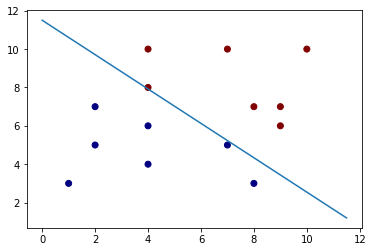

In [11]:
nx=np.arange(0,12,0.5)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

0.0
Loss History


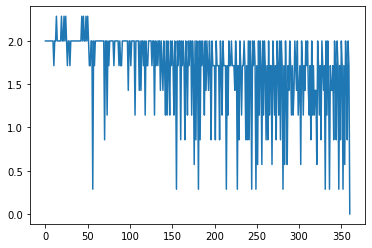

In [12]:
n = len(loss)-1
print(loss[n])
print('Loss History')
plt.plot(loss)  
plt.show()

<b>Task_4: Train a perceptron on Iris Data</b>
* First 100 data will be used.
* Only the first two features will be used for this task.

* Your implementation should correctly classify all the data.
* Plot the prediction, decision and loss history.

In [13]:
from sklearn import datasets   

In [14]:
datas=datasets.load_iris()
X=datas['data'][:100]      #first two class only.
y=datas['target'][:100]
# print(X.shape, y.shape)

X=X[:,:2]  #first two column.
print('X:',X.shape, '  y:',y.shape)

X: (100, 2)   y: (100,)


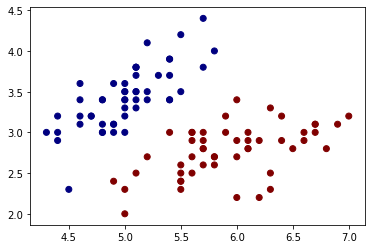

In [15]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet') 
plt.show()

In [16]:
#your code goes here.
for i in range(len(y)):
    if y[i]==0:
        y[i] = -1
XX=np.c_[np.ones(X.shape[0]), X]

In [17]:
w,y_head,loss = perceptron(XX, y)
print(w)

[-10.5035255    6.53316664  -8.23846001]


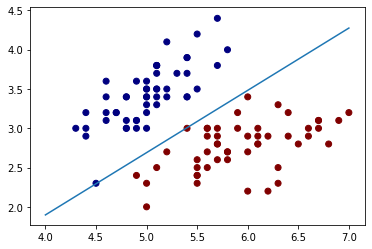

In [18]:
nx=np.arange(4,7.5,0.5)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

0.0
Loss History


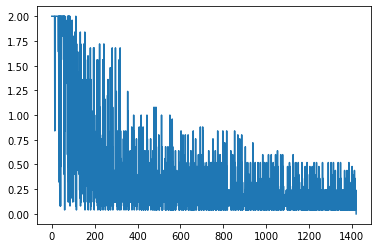

In [19]:
n = len(loss)-1
print(loss[n])
print('Loss History')
plt.plot(loss)  
plt.show()

### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Syed Jafrul Husen</u> bearing registration no. <u>170103020013</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Syed Jafrul Husen</u><br>
Date: <u>13/07/2020</u>

_your__writing_